In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import geopandas as gpd
import pandas as pd
zipcodes = gpd.GeoDataFrame.from_file("../data/NYC_shapefiles/ZIP_CODE_040114.shp")

,CENTER,ZIPCODE,geometry
0,POINT (1040696.262135346 185580.2219261294),11436,POINT (1040696.262135346 185580.2219261294)
1,POINT (1001912.871996464 183803.1131541387),11213,POINT (1001912.871996464 183803.1131541387)
2,POINT (1008365.375095716 180768.9448689806),11212,POINT (1008365.375095716 180768.9448689806)
3,POINT (997023.1926918939 180870.3533321874),11225,POINT (997023.1926918939 180870.3533321874)
4,POINT (990785.2911208548 173656.0483912228),11218,POINT (990785.2911208548 173656.0483912228)


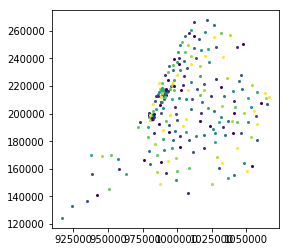

In [2]:
zipcodes_proj = zipcodes.to_crs({'init': u'epsg:2263'})
zipcodes_proj["CENTER"] = zipcodes_proj.geometry.centroid
centers = gpd.GeoDataFrame(zipcodes_proj[["CENTER", "ZIPCODE"]] , geometry=zipcodes_proj["CENTER"])
centers.plot()
centers.head()

In [3]:
centers_csv = pd.DataFrame(columns=['x', 'y', 'zipcode'])
centers_csv["x"] = centers.centroid.map(lambda p: p.x)
centers_csv["y"] = centers.centroid.map(lambda p: p.y)
centers_csv["zipcode"] = centers["ZIPCODE"]
centers_csv.to_csv('../clean-data/zip_centers.csv', index=False)
#centers.to_file('../clean-data/zip_centers.shp')

In [4]:
test = pd.read_csv("../clean-data/zip_centers.csv")


In [5]:
test.head()

,x,y,zipcode
0,1.040696e+06,185580.221926,11436
1,1.001913e+06,183803.113154,11213
2,1.008365e+06,180768.944869,11212
3,9.970232e+05,180870.353332,11225
4,9.907853e+05,173656.048391,11218
